In [1]:
from google.colab import drive
import sys
import os
mount='/content/drive'
drive.mount(mount)
drive_root = mount + "/My Drive/colab/pytorch-lasso-master"
%cd $drive_root

Mounted at /content/drive
/content/drive/My Drive/colab/pytorch-lasso-master


In [2]:
import math
import time
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, Colormap
import torch
import numpy as np

from lasso.linear import dict_learning, dict_evaluate, k_deep_simplex, sparse_encode
import torch.nn.functional as F
from torch.nn.modules.utils import _pair

# Data

Load MNIST

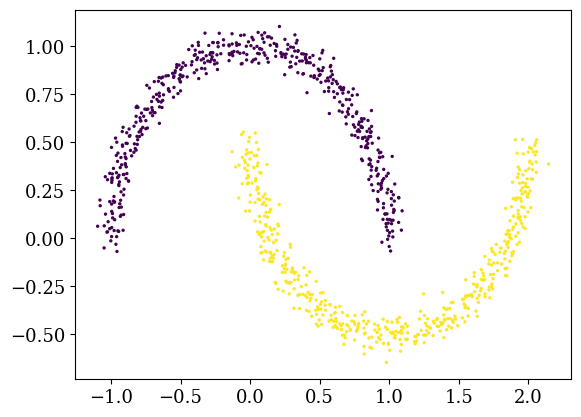

In [10]:
from sklearn.datasets import make_moons
np.random.seed(42)
quantity = 1000
data, labels = make_moons(quantity)
data = torch.tensor(data).float()
data += 0.05 * torch.randn(data.shape)
labels = torch.tensor(labels)

plt.scatter(np.array(data)[:,0], np.array(data)[:,1],s=2,c=labels)

In [4]:
#device = torch.device('cuda')
device = torch.device('cuda') 

# Constrained dictionary learning

ISTA

In [21]:
torch.manual_seed(32)
num_atoms = 14
lam = 0.15
options = dict(algorithm='ista', init='ridge', maxiter=150, fast=True, lr='auto')
weight, losses, Z = dict_learning(data, num_atoms, alpha=lam, constrained=True, device=device, steps=250, **options)
time.sleep(0.3)
#print('test loss: %0.4f' % dict_evaluate(X_test, weight, alpha=lam, **options))

100%|██████████| 250/250 [00:08<00:00, 28.86it/s, loss=0.146]


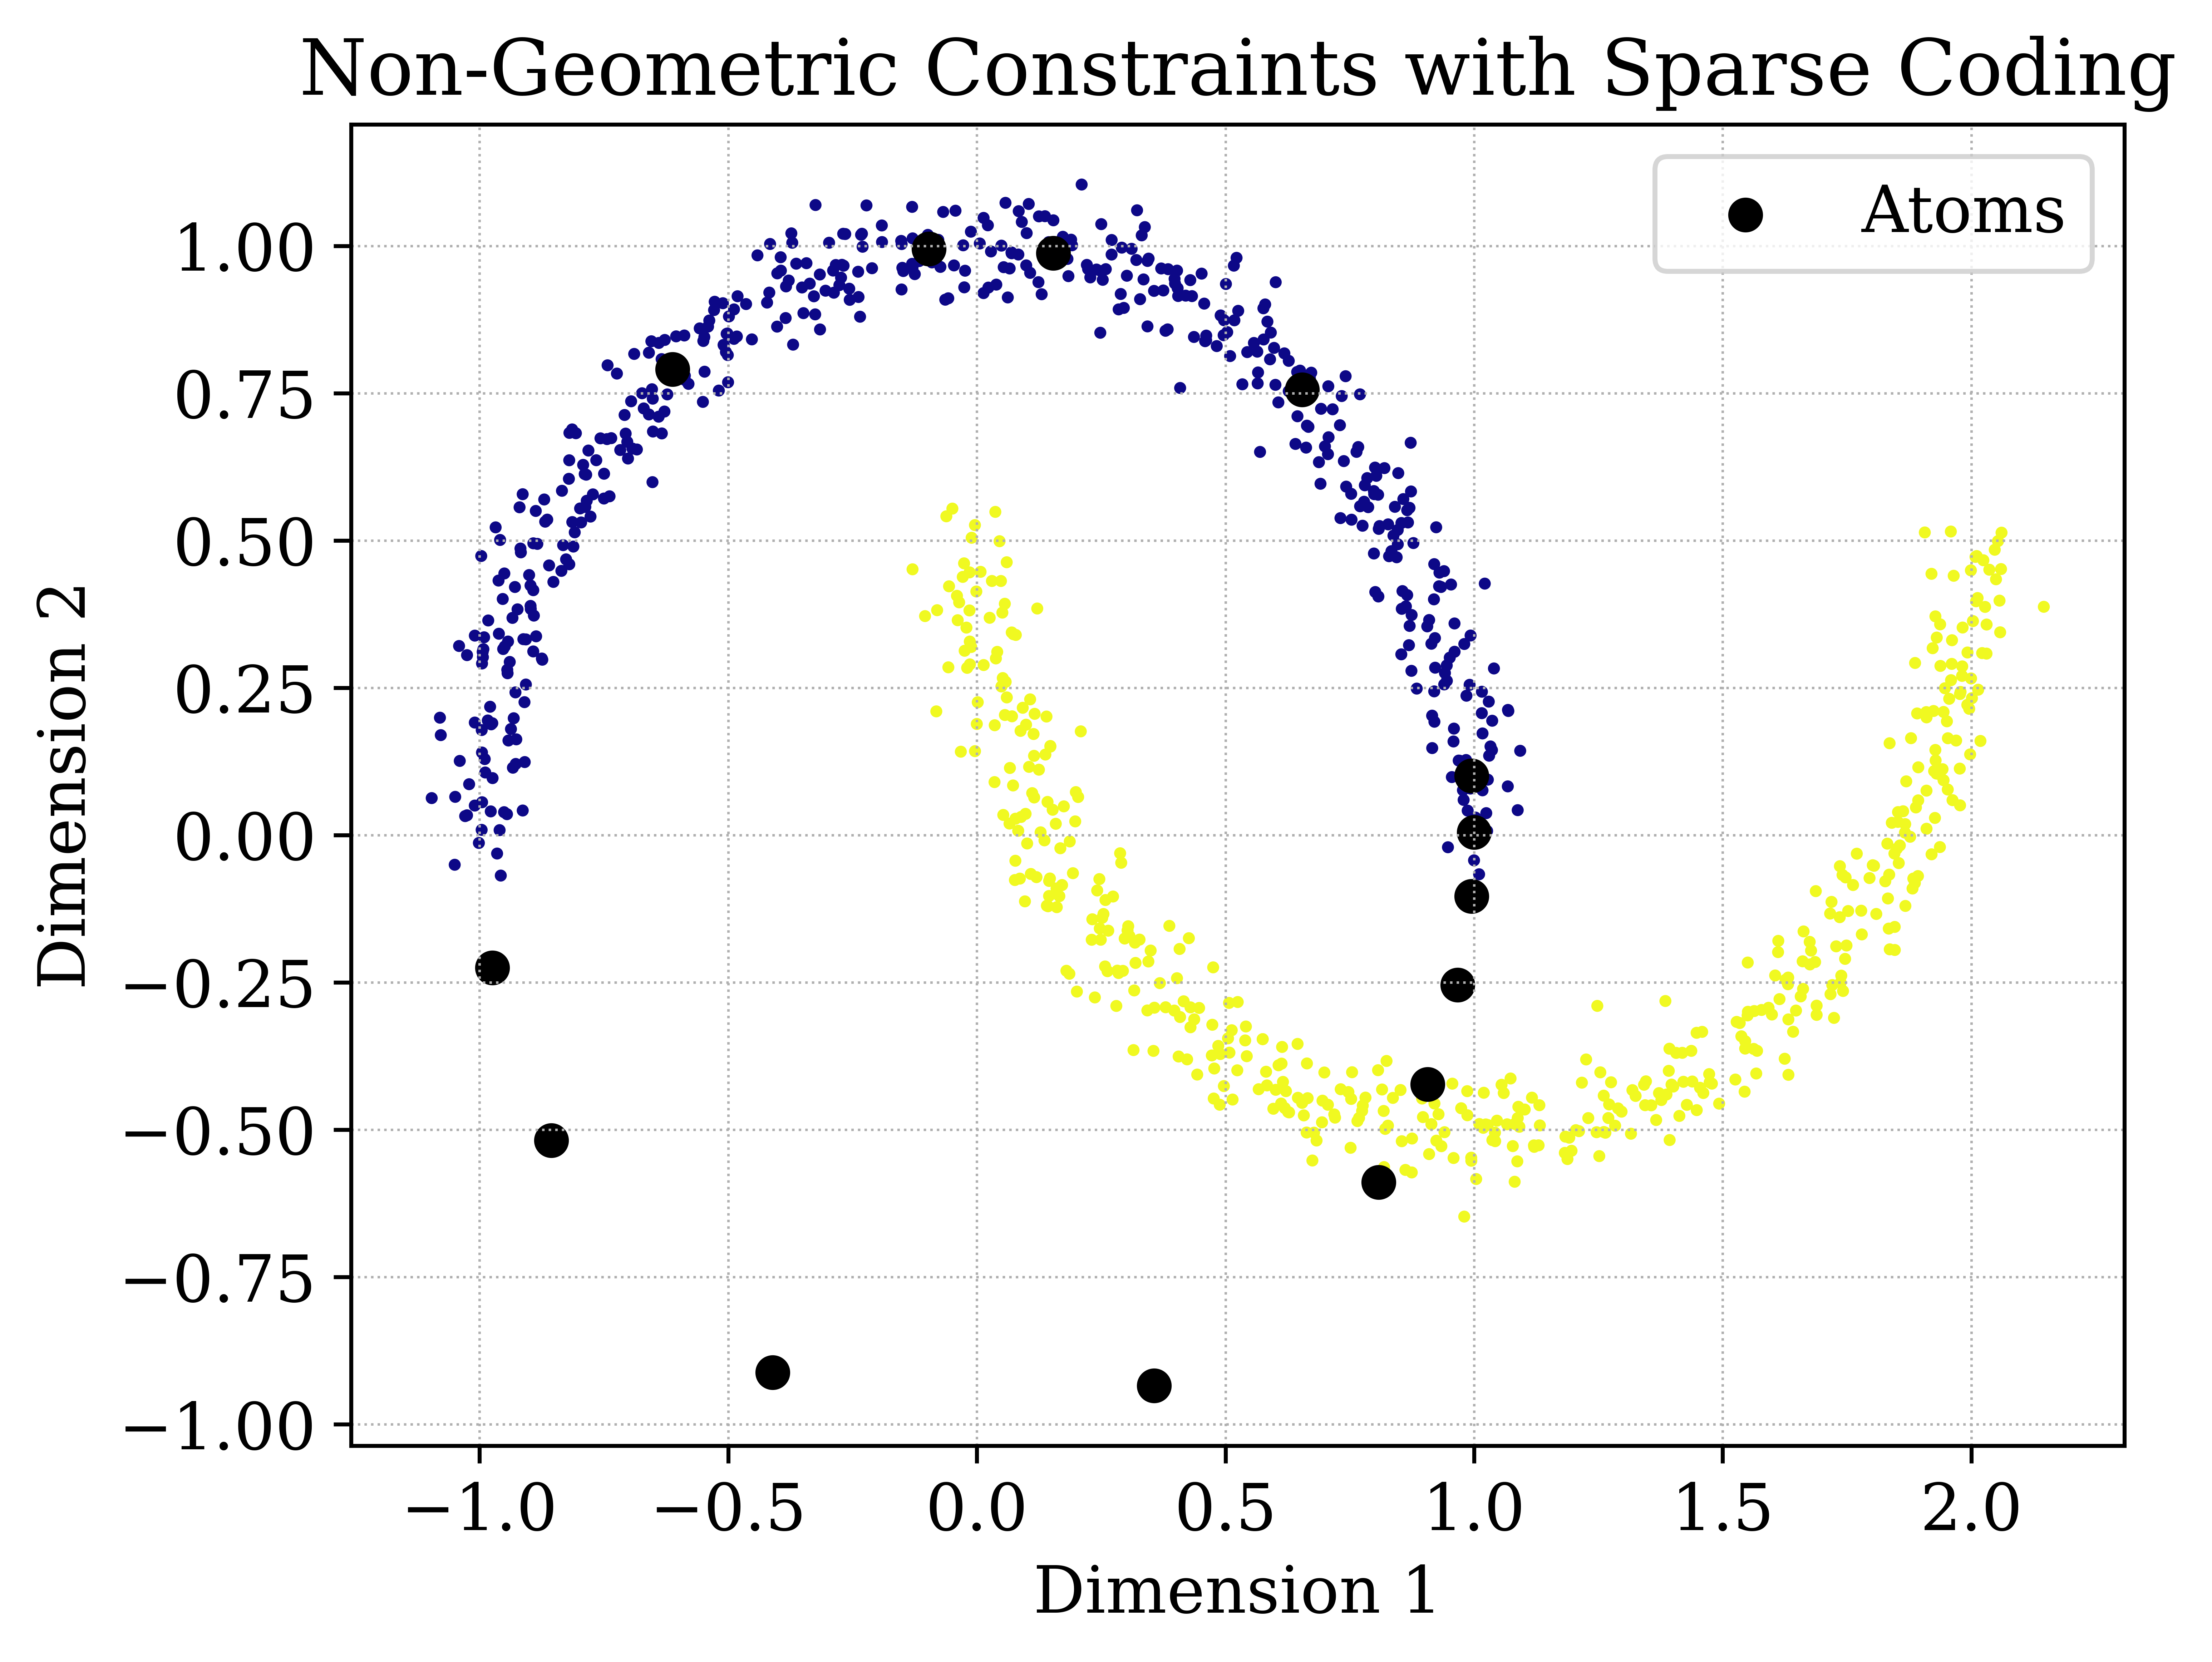

In [24]:
weight_np = weight.cpu().numpy()

fig = plt.gcf()
plt.rcParams.update({'font.size': 13, 'font.family': 'serif'})
plt.scatter(np.array(data)[:,0], np.array(data)[:,1],s=2,c=labels, cmap='plasma')
plt.scatter(weight_np[0],weight_np[1],c='black', label='Atoms')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('Non-Geometric Constraints with Sparse Coding')
plt.grid(linestyle="dotted", linewidth=0.5)
fig.set_dpi(1000)
#fig.savefig('sc_moons.png', dpi=1000)

KDS code

In [17]:
num_layers = 15 
kds_lr = 1e-2
kds_epochs = 100
penalty = 0.15
num_atoms = 14
batch_size = 256
net = k_deep_simplex.KDS(num_layers=num_layers, input_size=2**2, penalty=penalty, hidden_size=num_atoms, train_step=True)
loss, dic, codes = k_deep_simplex.run_kds_experiment(lam=penalty, data=data, net=net, lr=kds_lr, epochs=kds_epochs, batch_size=batch_size, device=device)

100%|██████████| 100/100 [00:07<00:00, 13.96it/s]


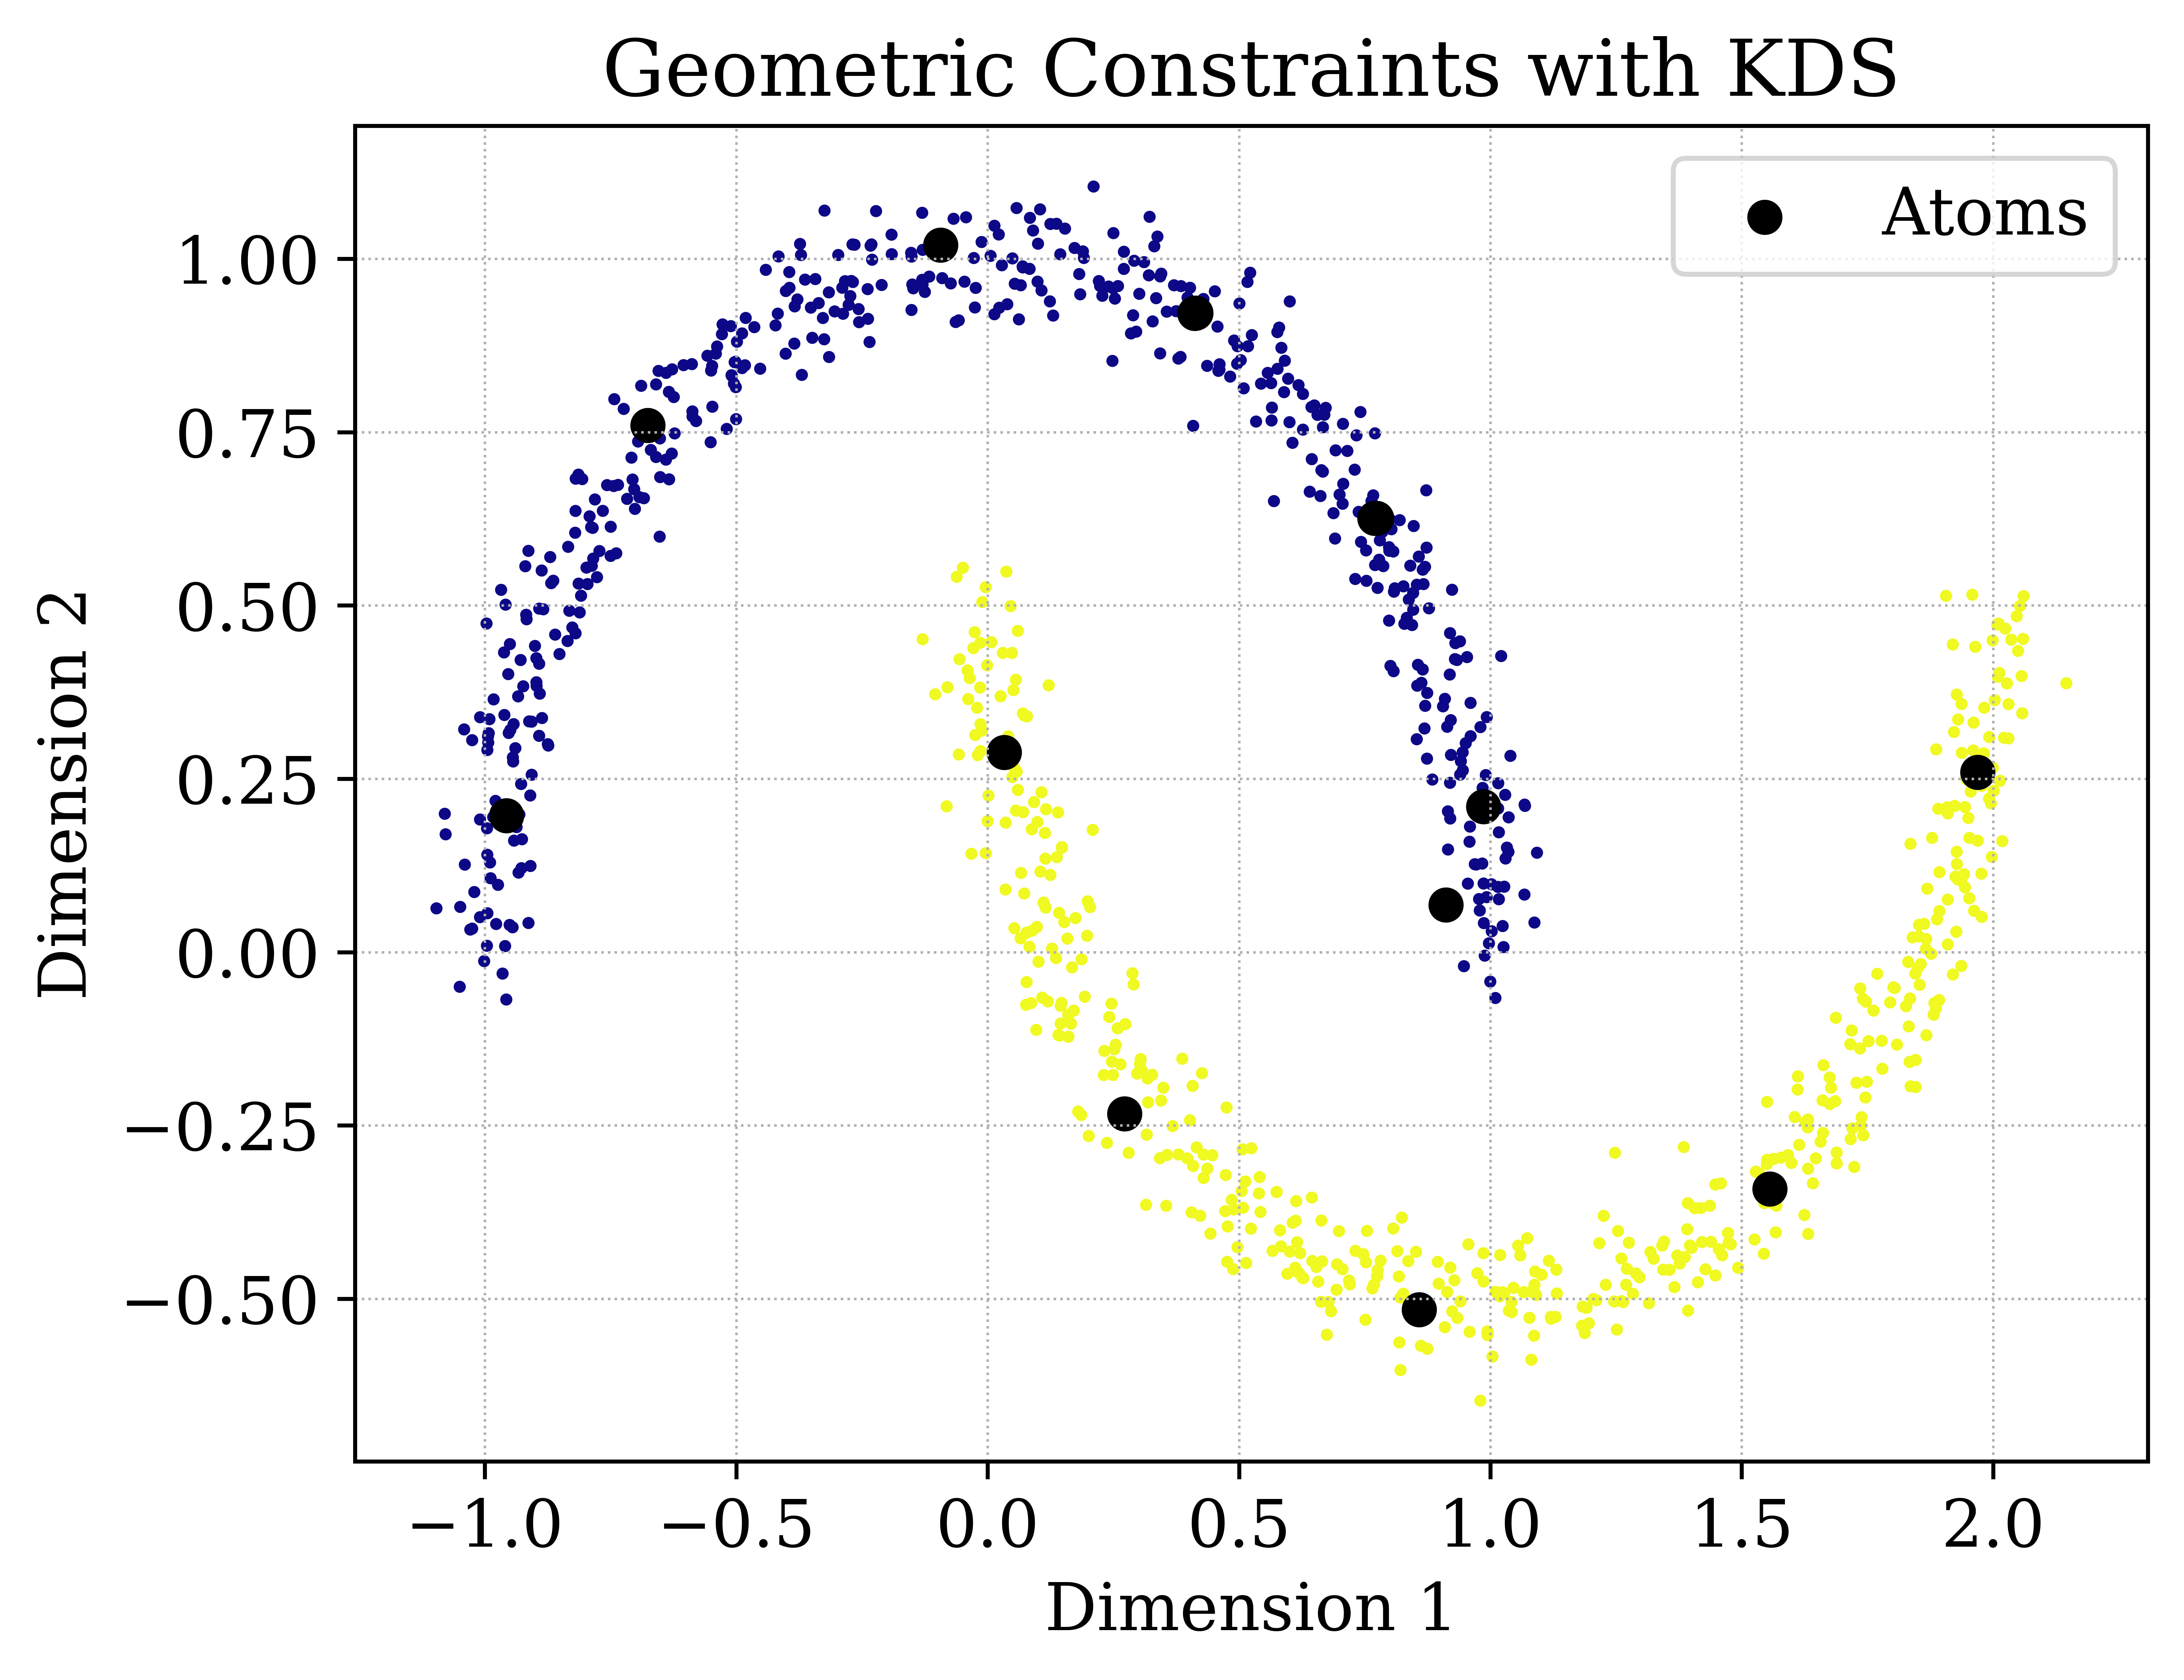

In [23]:
fig = plt.gcf()
plt.rcParams.update({'font.size': 13, 'font.family': 'serif'})
plt.scatter(np.array(data)[:,0], np.array(data)[:,1],s=2,c=labels, cmap='plasma')
plt.scatter(dic.T[0],dic.T[1],c='black', label='Atoms')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('Geometric Constraints with KDS')
plt.grid(linestyle="dotted", linewidth=0.5)
fig.set_dpi(1000)
#fig.savefig('kds_moons.png', dpi=1000)